In [1]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.log_gauss_pines import LogGaussPines



In [2]:
# initialize jax RNG
key = jr.PRNGKey(0)

In [5]:
dist = LogGaussPines()
print(f"Dimension: {dist.dim}")

Dimension: 1600


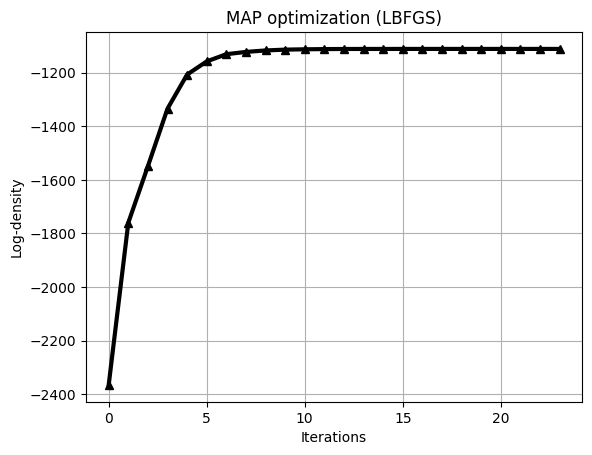

In [34]:
# compute the MAP
x0 = jnp.zeros(dist.dim)

# optimize the logdensity with LBFGS from scipy
from scipy.optimize import minimize

# use a callback to store the iterates
opt_history = []
def callback(x):
    opt_history.append(-dist(x))
res = minimize(lambda x: -dist(x), x0,
               jac=lambda x: -dist.grad(x),
               method='L-BFGS-B', callback=callback, 
               options={'maxiter': 1000, 'disp': False, 'gtol': 1e-8})
x_map = res.x

# plot the optimization history
plt.plot(-np.array(opt_history), "k-^", lw=3, label='L-BFGS-B')
plt.xlabel('Iterations')
plt.ylabel('Log-density')
plt.title("MAP optimization (LBFGS)")
plt.grid()


Text(0.5, 1.0, 'MAP estimate of Cox process intensity')

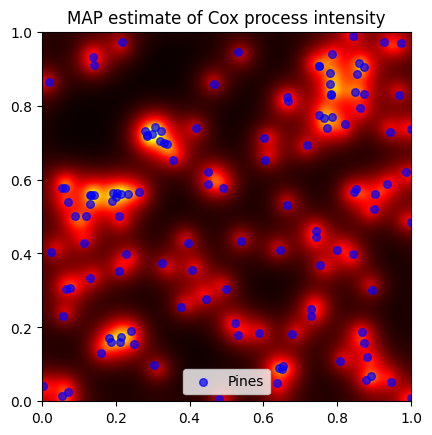

In [40]:
grid_dim = np.sqrt(dist.dim).astype(int)
x_map_grid = x_map.reshape(grid_dim, grid_dim)
plt.imshow(x_map_grid, cmap='hot', interpolation='bicubic', extent=[0, 1, 0, 1], origin='lower')

# superpose the data
pines_locations = dist.pines_points
plt.scatter(pines_locations[:, 1], pines_locations[:, 0],
            color='blue', marker="o", s=30, alpha=0.7,
            label='Pines')
plt.legend()

plt.title('MAP estimate of Cox process intensity')